In [1]:
import warnings
warnings.simplefilter('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import numpy as np

#import pandas_summary as ps
#import pandas_profiling

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples

get_ipython().magic('matplotlib inline')
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [2]:
my_seed = 13

In [3]:
data = pd.read_csv(r'C:\Users\theli\Desktop\clients.csv')

In [4]:
data.head()

month  credit_amount  credit_term  age     sex  \
0      1           7000           12   39    male   
1      1          19000            6   20    male   
2      1          29000           12   23  female   
3      1          10000           12   30    male   
4      1          14500           12   25  female   

                     education          product_type  having_children_flg  \
0  Secondary special education           Cell phones                    0   
1  Secondary special education  Household appliances                    1   
2  Secondary special education  Household appliances                    0   
3  Secondary special education           Cell phones                    1   
4             Higher education           Cell phones                    0   

   region  income family_status  phone_operator  is_client  bad_client_target  
0       2   21000       Another               0          0                  0  
1       2   17000       Another               3          1                  0  
2       2   31000       Another               2          0                  0  
3       2   31000     Unmarried               3          1                  0  
4       2   26000       Married               0          1                  0

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1723 entries, 0 to 1722
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   month                1723 non-null   int64 
 1   credit_amount        1723 non-null   int64 
 2   credit_term          1723 non-null   int64 
 3   age                  1723 non-null   int64 
 4   sex                  1723 non-null   object
 5   education            1723 non-null   object
 6   product_type         1723 non-null   object
 7   having_children_flg  1723 non-null   int64 
 8   region               1723 non-null   int64 
 9   income               1723 non-null   int64 
 10  family_status        1723 non-null   object
 11  phone_operator       1723 non-null   int64 
 12  is_client            1723 non-null   int64 
 13  bad_client_target    1723 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 188.6+ KB


In [6]:
data.describe()

month  credit_amount  credit_term          age  \
count  1723.000000    1723.000000  1723.000000  1723.000000   
mean      6.708067   29264.654672    11.546721    35.911782   
std       3.538420   27926.778301     6.548354    13.120203   
min       1.000000    5000.000000     3.000000    18.000000   
25%       3.000000   13000.000000     6.000000    26.000000   
50%       7.000000   21500.000000    12.000000    32.000000   
75%      10.000000   34000.000000    12.000000    44.000000   
max      12.000000  301000.000000    36.000000    90.000000   

       having_children_flg       region         income  phone_operator  \
count          1723.000000  1723.000000    1723.000000     1723.000000   
mean              0.428323     1.681370   32652.350551        1.125363   
std               0.494979     0.704256   20913.193158        1.015822   
min               0.000000     0.000000    1000.000000        0.000000   
25%               0.000000     2.000000   21000.000000        0.000000   
50%               0.000000     2.000000   27000.000000        1.000000   
75%               1.000000     2.000000   38000.000000        2.000000   
max               1.000000     2.000000  401000.000000        4.000000   

         is_client  bad_client_target  
count  1723.000000        1723.000000  
mean      0.604759           0.113755  
std       0.489044           0.317606  
min       0.000000           0.000000  
25%       0.000000           0.000000  
50%       1.000000           0.000000  
75%       1.000000           0.000000  
max       1.000000           1.000000

In [7]:
data.isna().sum()

month                  0
credit_amount          0
credit_term            0
age                    0
sex                    0
education              0
product_type           0
having_children_flg    0
region                 0
income                 0
family_status          0
phone_operator         0
is_client              0
bad_client_target      0
dtype: int64

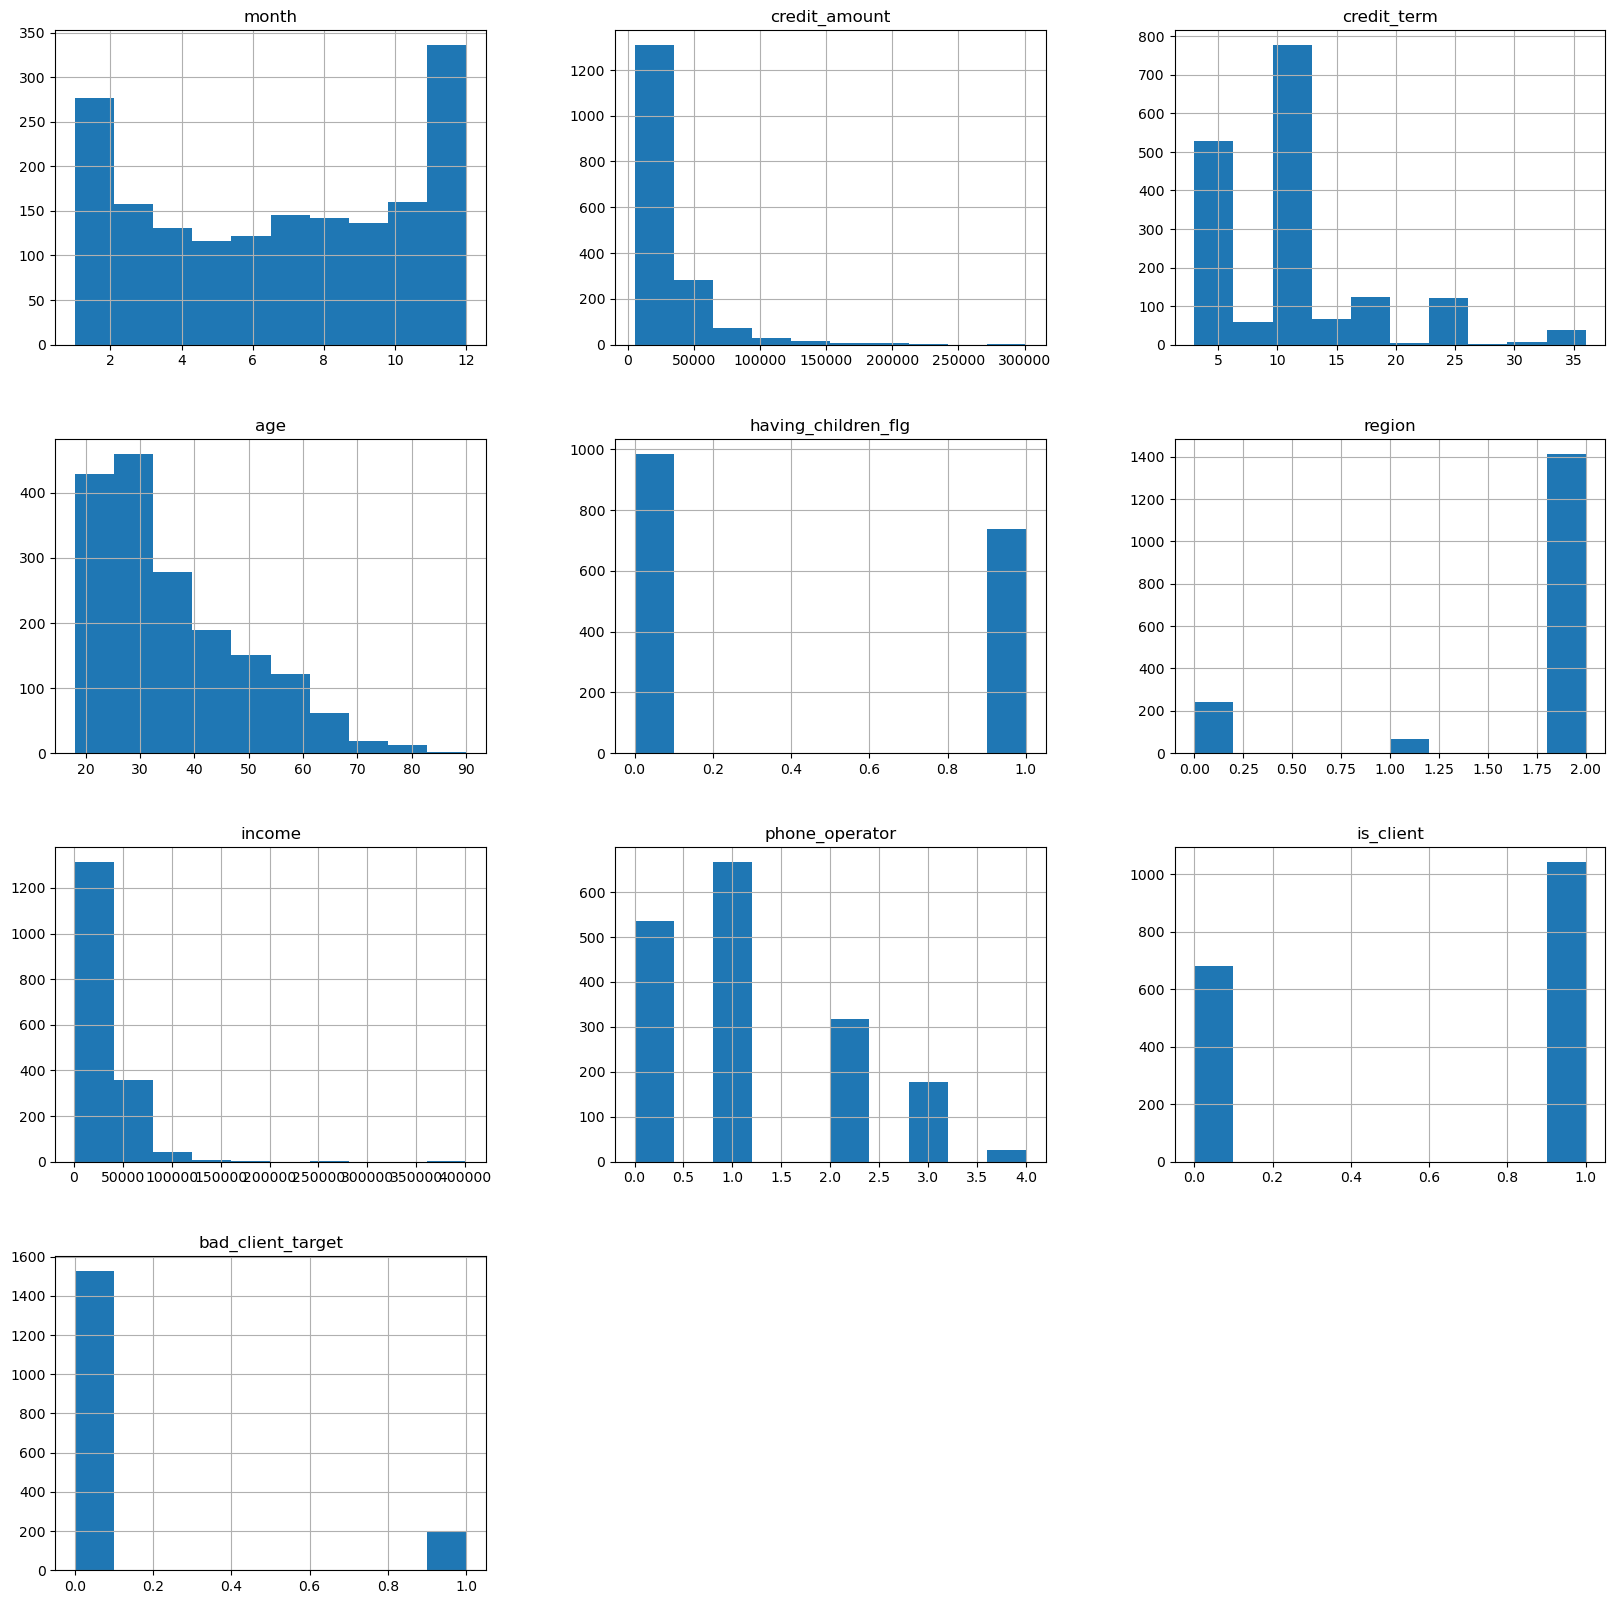

In [8]:
data.hist(figsize=(20,20))
plt.show()

In [9]:
mapper = dict((val, i) for i, val in enumerate(data.sex.unique()))
mapper

{'male': 0, 'female': 1}

In [10]:
data['sex'] = data['sex'].map(mapper)

In [11]:
categoricals = data.select_dtypes(exclude='number').columns.tolist()
categoricals

['education', 'product_type', 'family_status']

In [12]:
df_4_cluster = pd.get_dummies(data, columns=categoricals, drop_first=False)

In [13]:
df_4_cluster.drop('month', axis=1, inplace=True)

In [14]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_4_cluster)
df_scaled = pd.DataFrame(df_scaled, columns=df_4_cluster.columns)
df_scaled.shape

(1723, 41)

In [15]:
pca = PCA(n_components=0.95, svd_solver='full', random_state=my_seed)
pca.fit(df_scaled)
df_pca = pca.transform(df_scaled)
df_pca.shape

(1723, 35)

In [16]:
pca.explained_variance_

array([2.63317762, 1.96747969, 1.77746456, 1.63244824, 1.49316579,
       1.30259448, 1.23701919, 1.22852471, 1.17406028, 1.15090933,
       1.1323733 , 1.10004686, 1.09590165, 1.08684183, 1.07126934,
       1.04064794, 1.03112202, 1.02569454, 1.01779996, 1.01353282,
       1.00847401, 1.0052676 , 1.00226985, 0.97836268, 0.96836493,
       0.94667853, 0.93222968, 0.90230659, 0.88588306, 0.87057742,
       0.85973295, 0.84434332, 0.7793238 , 0.74851017, 0.63567517])

In [17]:
tsne = TSNE(n_components=2, random_state=my_seed)

In [18]:
df_tsne = tsne.fit_transform(df_pca)
df_tsne.shape

(1723, 2)

In [19]:
import plotly.express as px

In [20]:
fig = px.scatter(df_tsne, df_tsne[:,0], df_tsne[:,1])
fig.show()

In [21]:
inertia = []
for i in tqdm(range(1, 11)):
    kmeans = KMeans(n_clusters=i, random_state=my_seed).fit(df_pca)
    labels = kmeans.labels_
    inertia_i = kmeans.inertia_
    inertia.append(inertia_i)

100%|██████████| 10/10 [00:02<00:00,  4.26it/s]


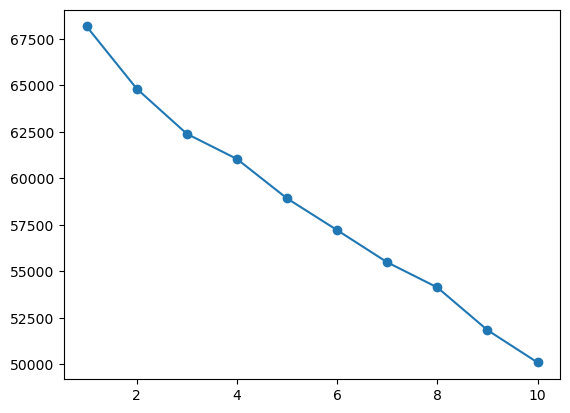

In [22]:
plt.plot(range(1, 11), inertia, marker='o')
plt.show()

In [23]:
D = []
for i in range(1, 9):
    Di = (inertia[i] - inertia[i+1])/(inertia[i-1] - inertia[i])
    D.append(Di)

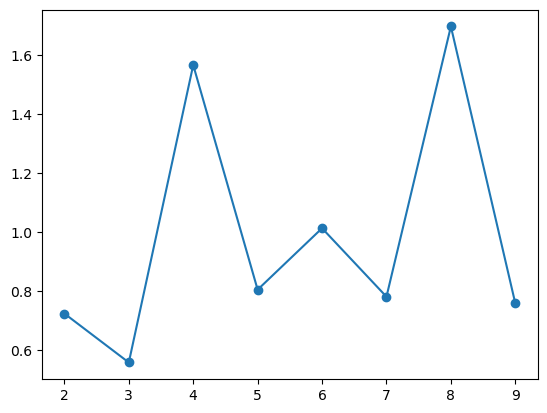

In [24]:
plt.plot(range(2, 10), D, marker='o');

In [25]:
silhouette = []
for i in tqdm(range(2, 10)):
    kmeans = KMeans(n_clusters=i, random_state=my_seed).fit(df_pca)
    labels = kmeans.labels_
    score = silhouette_score(df_pca, labels)
    silhouette.append(score)

100%|██████████| 8/8 [00:02<00:00,  3.50it/s]


For n_clusters = 2 The average silhouette_score is : 0.09326277876144325
For n_clusters = 3 The average silhouette_score is : 0.06833319479219786
For n_clusters = 4 The average silhouette_score is : 0.08287834218277716
For n_clusters = 5 The average silhouette_score is : 0.08439820060770141
For n_clusters = 6 The average silhouette_score is : 0.10089589887506079
For n_clusters = 7 The average silhouette_score is : 0.09603818260818783
For n_clusters = 8 The average silhouette_score is : 0.07120612050957777
For n_clusters = 9 The average silhouette_score is : 0.08692006642847044


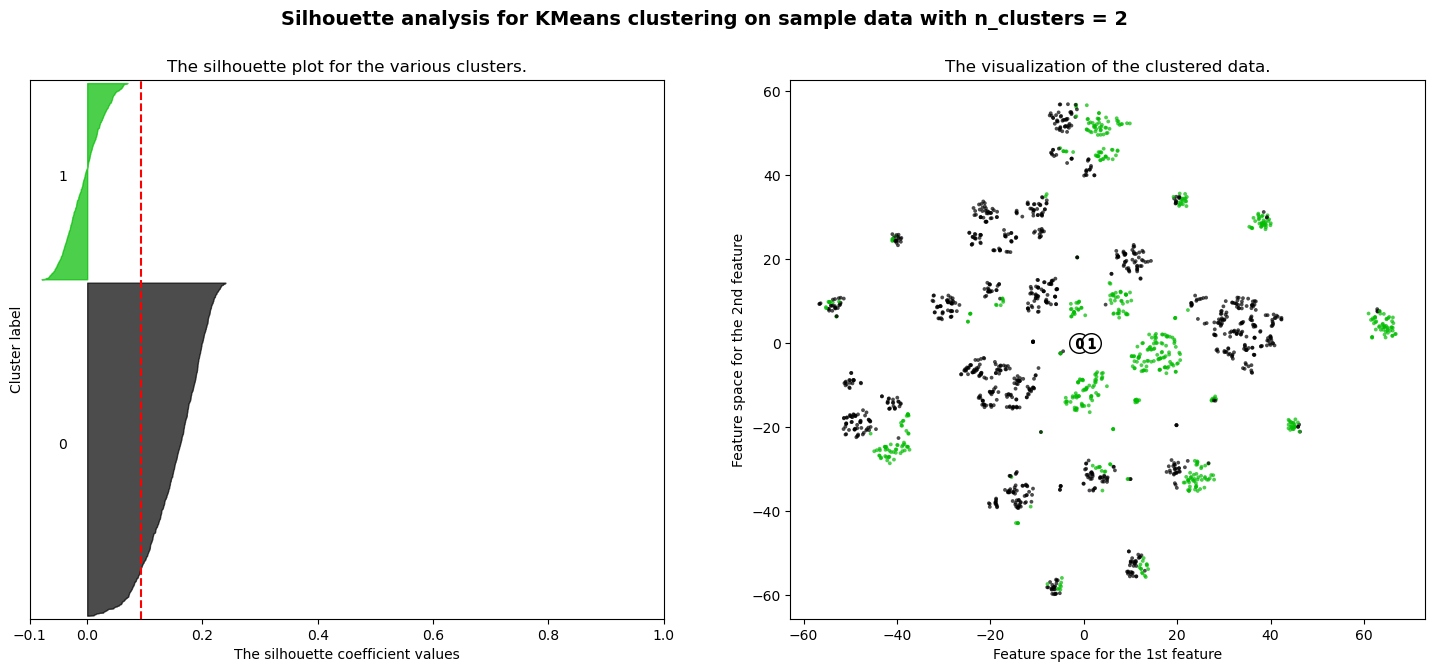

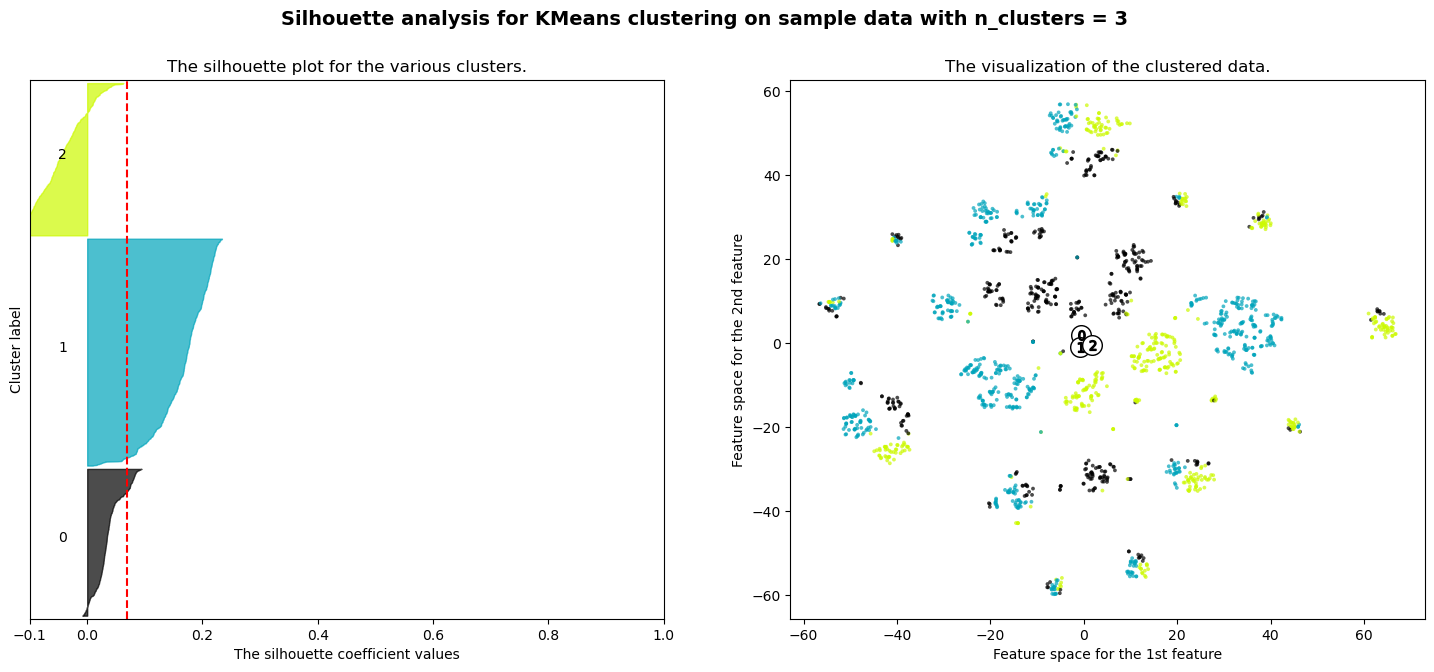

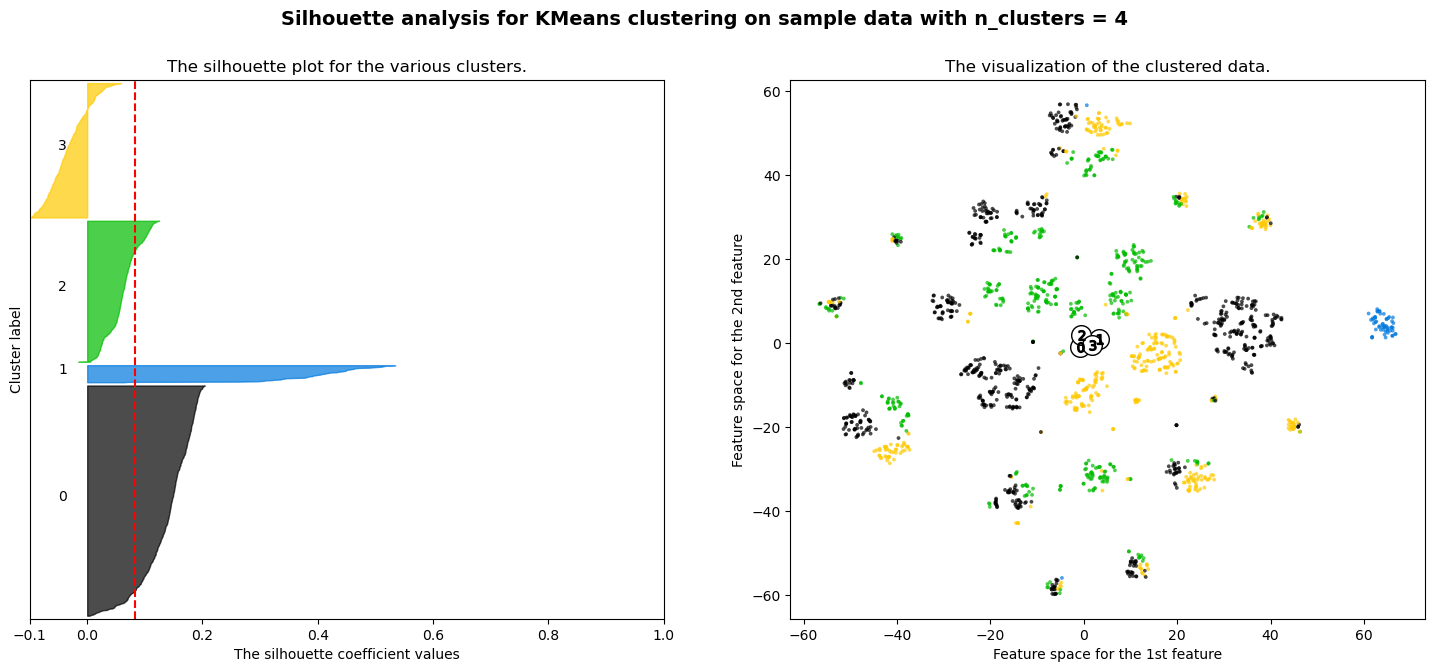

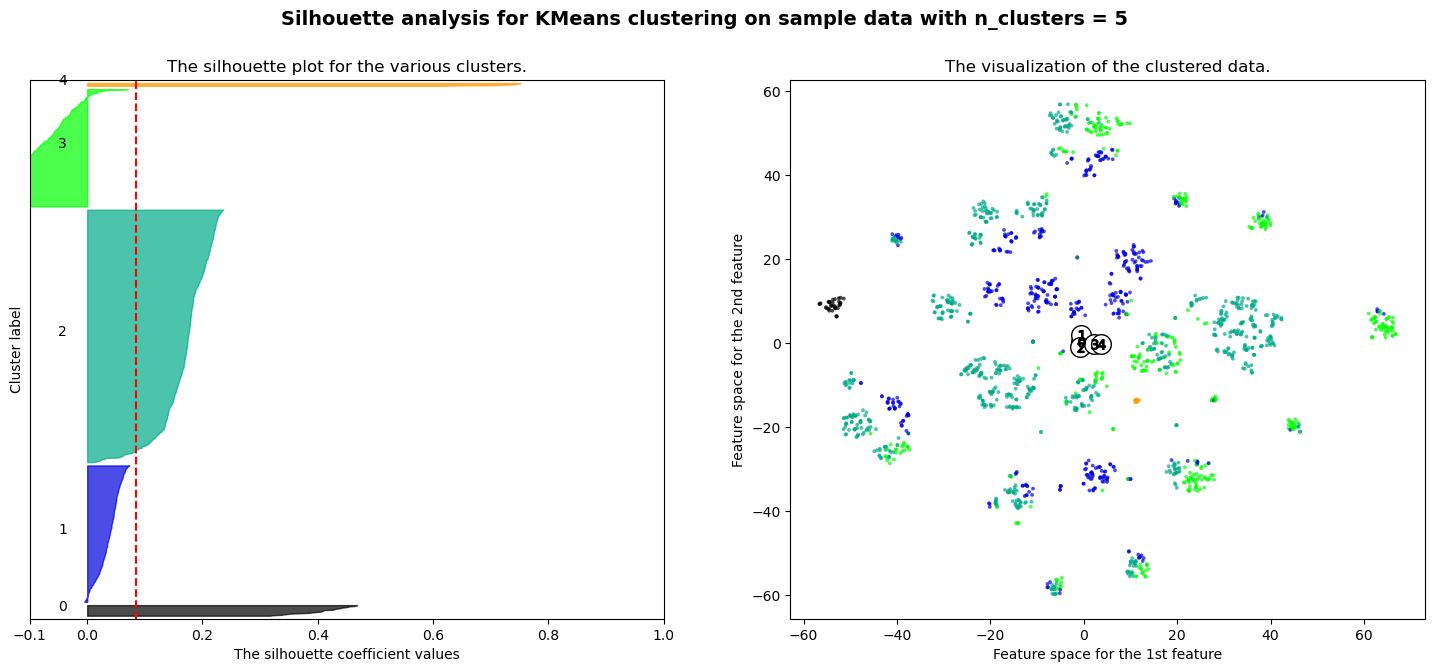

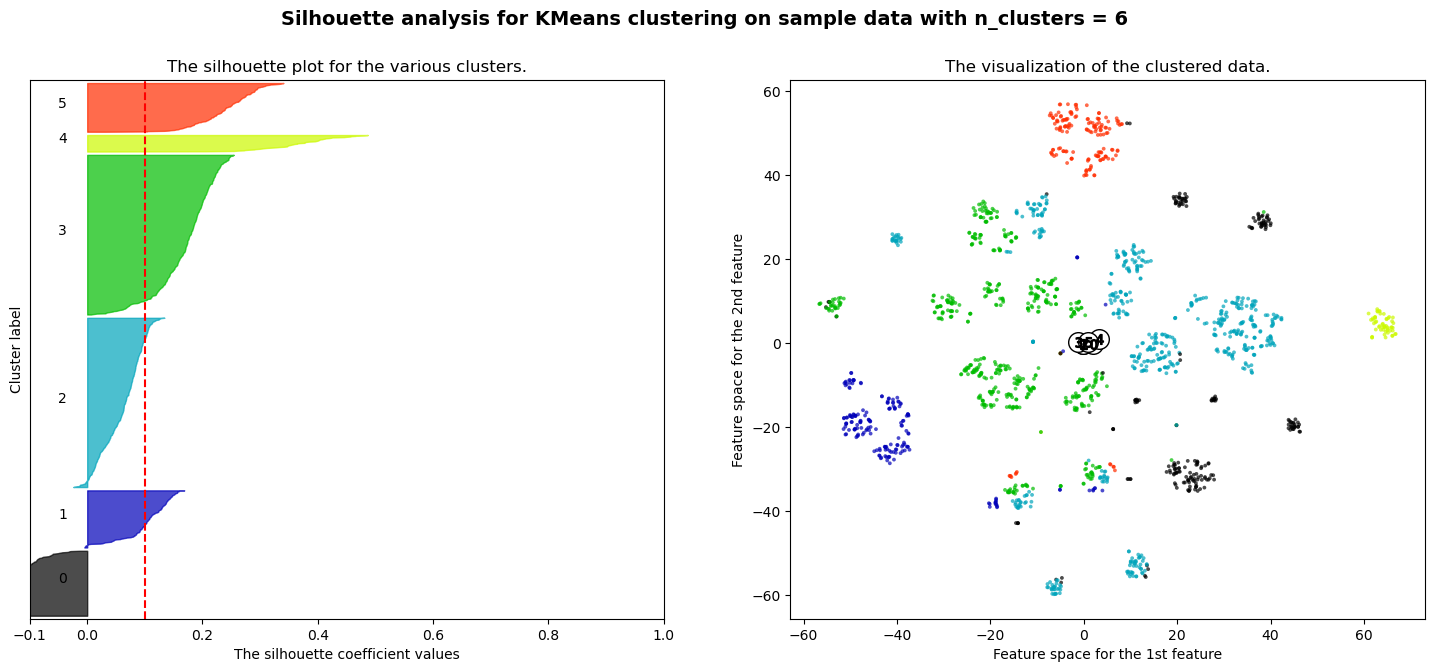

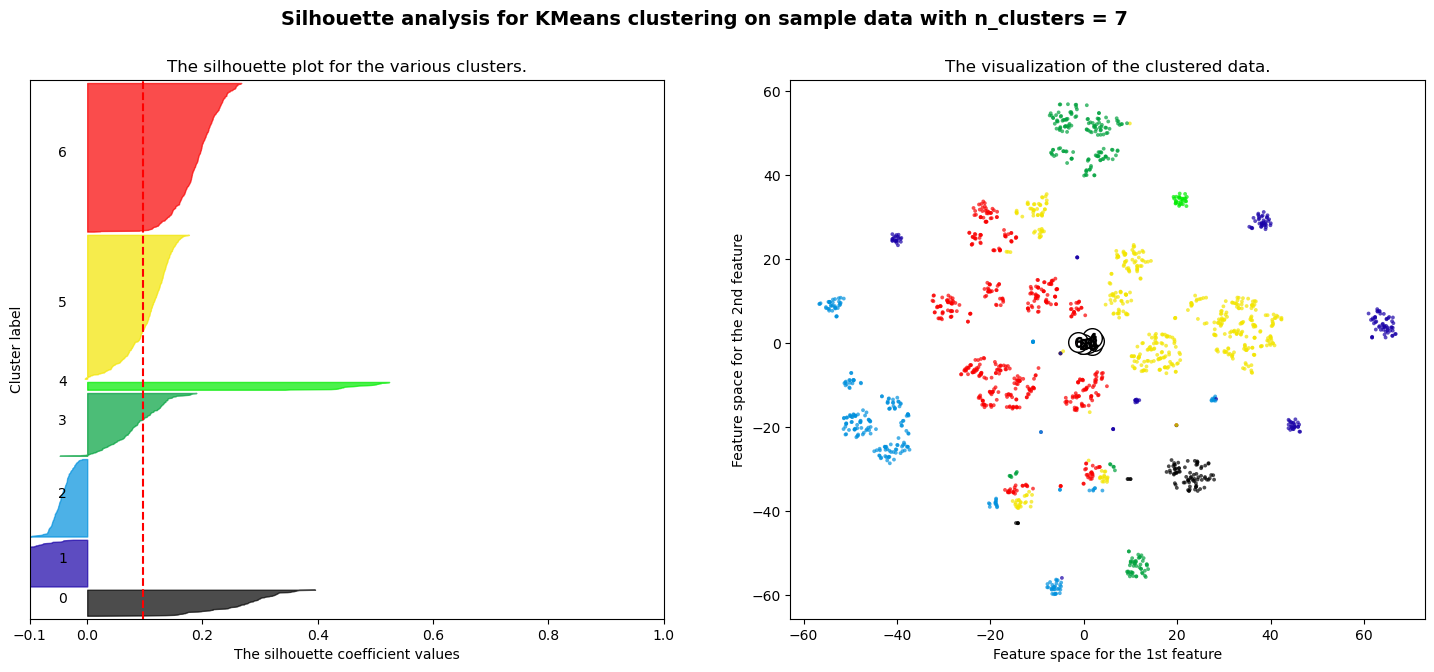

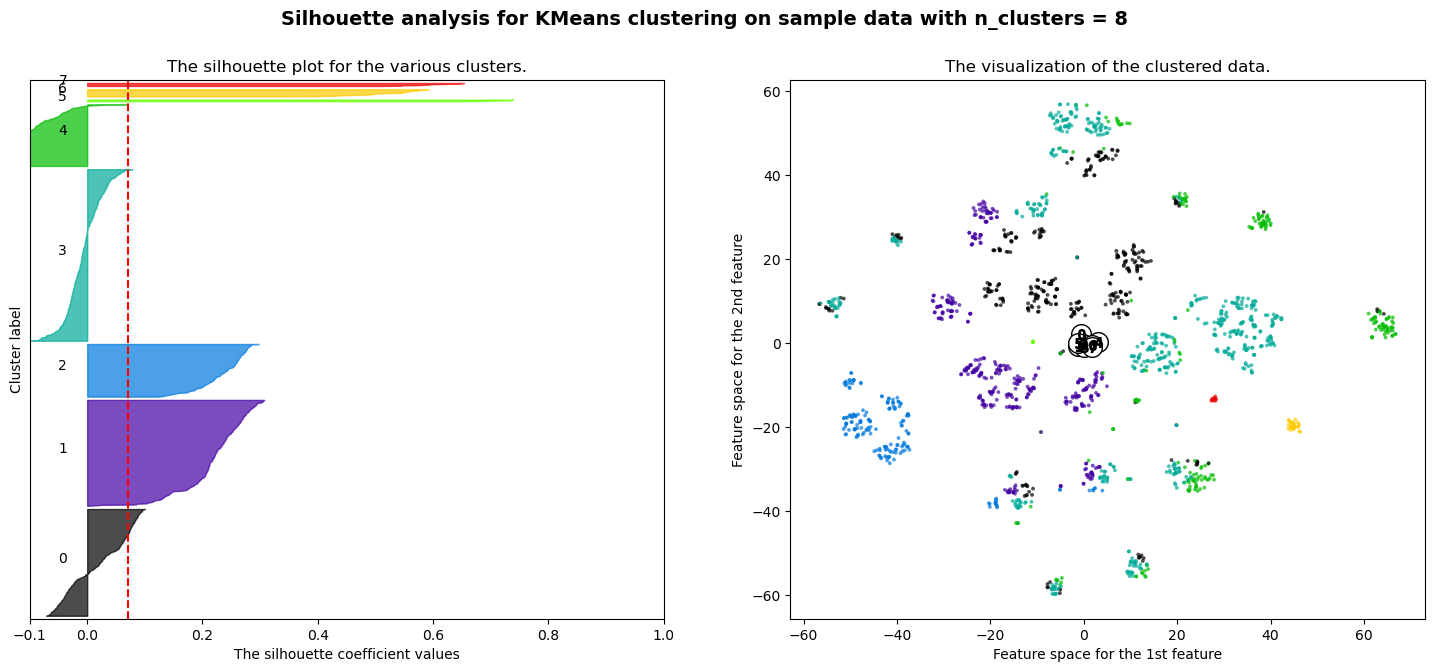

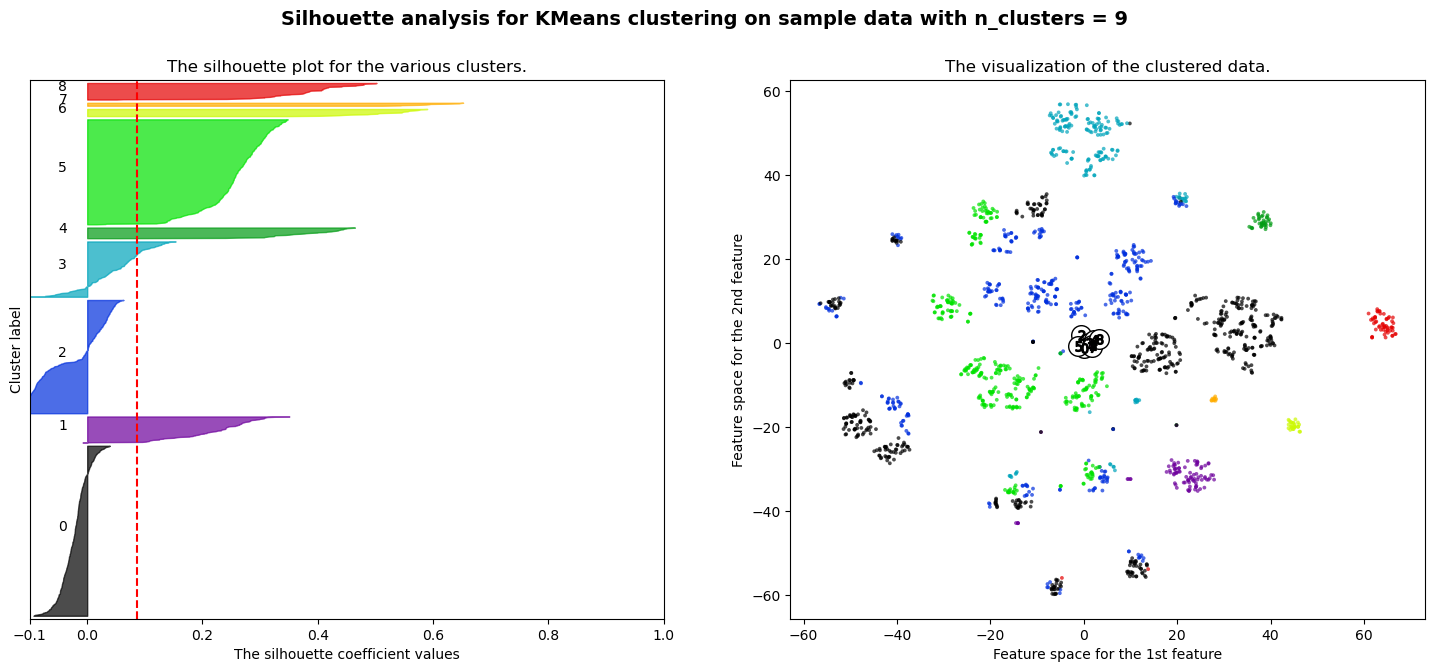

In [26]:
import matplotlib.cm as cm
range_n_clusters = list(range(2, 10))
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(df_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(df_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(df_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(df_tsne[:, 0], df_tsne[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [27]:
kmeans = KMeans(n_clusters=7, random_state=my_seed).fit(df_pca)
pd.Series(kmeans.labels_).value_counts()

0    557
4    505
2    252
1    178
6    175
5     55
3      1
dtype: int64

In [28]:
data['cluster'] = kmeans.labels_
data.head()

month  credit_amount  credit_term  age  sex                    education  \
0      1           7000           12   39    0  Secondary special education   
1      1          19000            6   20    0  Secondary special education   
2      1          29000           12   23    1  Secondary special education   
3      1          10000           12   30    0  Secondary special education   
4      1          14500           12   25    1             Higher education   

           product_type  having_children_flg  region  income family_status  \
0           Cell phones                    0       2   21000       Another   
1  Household appliances                    1       2   17000       Another   
2  Household appliances                    0       2   31000       Another   
3           Cell phones                    1       2   31000     Unmarried   
4           Cell phones                    0       2   26000       Married   

   phone_operator  is_client  bad_client_target  cluster  
0               0          0                  0        0  
1               3          1                  0        4  
2               2          0                  0        4  
3               3          1                  0        0  
4               0          1                  0        0

In [29]:
# centroids = kmeans.cluster_centers_
# pd.DataFrame(centroids)

# EDA for clusters

In [30]:
sex_map = {0 :'male',
           1 :'female'}
data['sex'] = data['sex'].map(sex_map)

In [31]:
data.head()

month  credit_amount  credit_term  age     sex  \
0      1           7000           12   39    male   
1      1          19000            6   20    male   
2      1          29000           12   23  female   
3      1          10000           12   30    male   
4      1          14500           12   25  female   

                     education          product_type  having_children_flg  \
0  Secondary special education           Cell phones                    0   
1  Secondary special education  Household appliances                    1   
2  Secondary special education  Household appliances                    0   
3  Secondary special education           Cell phones                    1   
4             Higher education           Cell phones                    0   

   region  income family_status  phone_operator  is_client  bad_client_target  \
0       2   21000       Another               0          0                  0   
1       2   17000       Another               3          1                  0   
2       2   31000       Another               2          0                  0   
3       2   31000     Unmarried               3          1                  0   
4       2   26000       Married               0          1                  0   

   cluster  
0        0  
1        4  
2        4  
3        0  
4        0

In [32]:
data.groupby('cluster')['credit_amount', 'credit_term'].describe()

credit_amount                                                         \
                count          mean           std      min      25%      50%   
cluster                                                                        
0               557.0  18845.601436  11190.367270   5000.0  10000.0  16000.0   
1               178.0  22606.741573  13488.218737   5500.0  13000.0  20500.0   
2               252.0  41859.126984  37350.885417   6000.0  17000.0  29000.0   
3                 1.0   8000.000000           NaN   8000.0   8000.0   8000.0   
4               505.0  26099.009901  20070.315357   5000.0  13000.0  21500.0   
5                55.0  60400.000000  29895.868660  16000.0  41000.0  46500.0   
6               175.0  50534.285714  47548.541095   5500.0  23500.0  36000.0   

                           credit_term                                        \
             75%       max       count       mean       std  min   25%   50%   
cluster                                                                        
0        26500.0  123500.0       557.0  10.068223  4.016470  3.0   6.0  10.0   
1        28875.0   78500.0       178.0  10.415730  5.109665  3.0   6.0  12.0   
2        51250.0  201000.0       252.0  12.865079  8.503904  3.0   6.0  12.0   
3         8000.0    8000.0         1.0   4.000000       NaN  4.0   4.0   4.0   
4        30500.0  163000.0       505.0  11.667327  6.499101  3.0   6.0  12.0   
5        73500.0  199000.0        55.0  22.200000  6.990470  9.0  18.0  24.0   
6        60500.0  301000.0       175.0  11.851429  7.568134  3.0   6.0  11.0   

                     
          75%   max  
cluster              
0        12.0  36.0  
1        12.0  24.0  
2        15.0  36.0  
3         4.0   4.0  
4        12.0  36.0  
5        24.0  36.0  
6        15.0  36.0

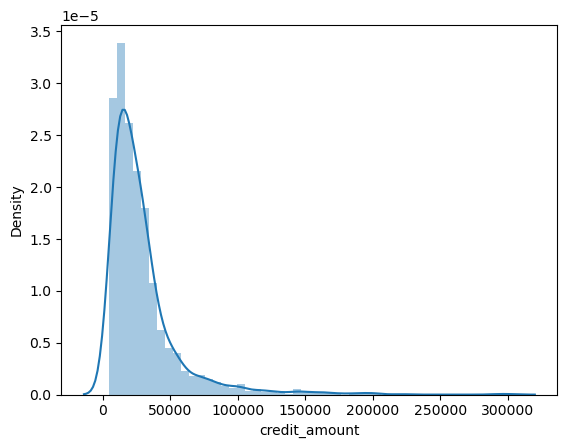

In [33]:
sns.distplot(data['credit_amount'])
plt.show()

In [34]:
def scale_range(inp, min, max):
    inp += (-np.min(inp))
    inp /= np.max(inp) / (max-min)
    inp += min
    return inp

def plot_rate(df, column, target, num_buckets=5):
    data = pd.DataFrame(df[column], columns=[column,])
    data['target'] = target
    tmp_ = data.dropna().groupby(column).agg({'target': ['mean', sum, 'count']})
    tmp_['index'] = range(tmp_.shape[0])
    tmp = pd.DataFrame({'index': range(tmp_.shape[0]), 'value': tmp_.index, 'mean': tmp_['target']['mean'], 
                        'sum': tmp_['target']['sum'], 'count': tmp_['target']['count']})
    breakpoints = np.arange(0, num_buckets+1) / (num_buckets) * 100
    breakpoints = scale_range(breakpoints, np.min(tmp_['index'].values), np.max(tmp_['index'].values))
    percents = np.histogram(tmp_['index'], breakpoints)[0]
    
    l = []
    for bucket in range(num_buckets):
        l = l + [bucket] * int(percents[bucket])
        
    ll = []
    if (tmp_.shape[0] > len(l)) | (tmp_.shape == 2):
        ll = []
        for j in l:
            ll.append(j)
        if tmp.shape[0] > len(ll):
            tmp['bucket'] = ll + [max(ll)]
        else:
            tmp['bucket'] = ll
    else:
        tmp['bucket'] = l
    
    result = tmp.groupby('bucket').agg({'sum': 'sum', 'count': 'sum', 'value': [min, max]})
    result['avg_target'] = result['sum']['sum'] / result['count']['sum']
    
    plt.figure()
    plt.suptitle(column+' avg_target', size=16)
    sns.barplot(y=result['value']['min'].astype('int64'), x=result['avg_target'], orient='h')
    
    plt.figure()
    plt.suptitle(column+' count', size=16)
    sns.barplot(y=result['value']['min'].astype('int64'), x=result['count']['sum'], orient='h')

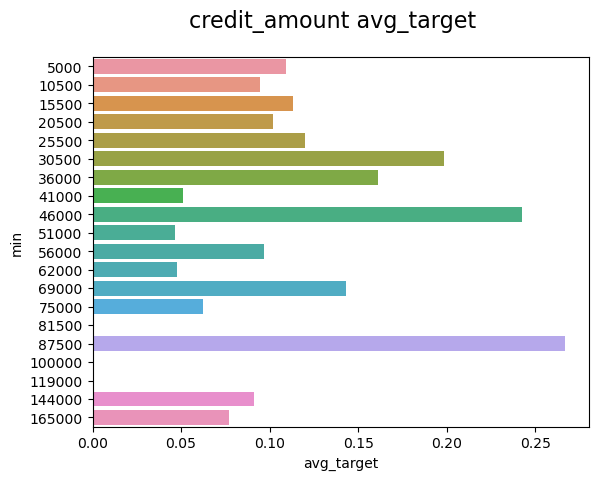

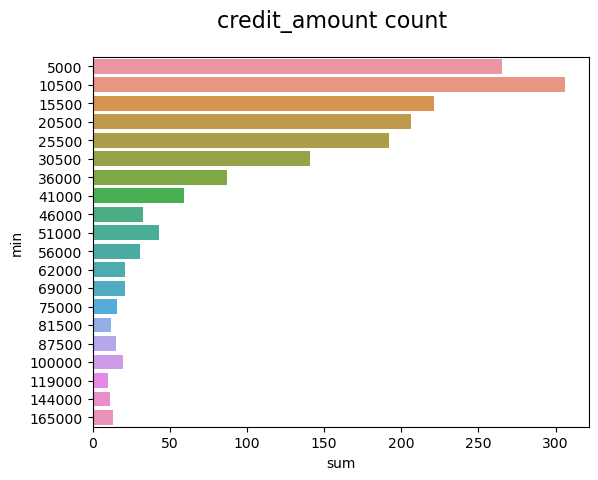

In [35]:
plot_rate(data, 'credit_amount', data['bad_client_target'], num_buckets=20)

In [36]:
income = data.groupby('cluster')['credit_amount'].agg({'min', "max", 'mean', 'median'})
income
fig = px.line(income, income.index, 'mean')
fig.show()

In [37]:
income

min          mean     max   median
cluster                                      
0         5000  18845.601436  123500  16000.0
1         5500  22606.741573   78500  20500.0
2         6000  41859.126984  201000  29000.0
3         8000   8000.000000    8000   8000.0
4         5000  26099.009901  163000  21500.0
5        16000  60400.000000  199000  46500.0
6         5500  50534.285714  301000  36000.0

Сумма кредита больше всего в пятом кластере, затем во втором.

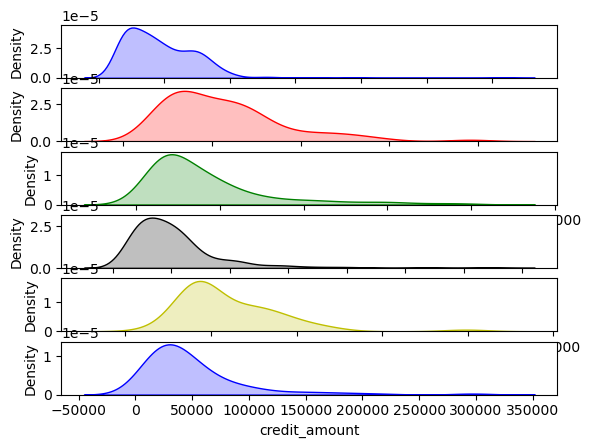

In [38]:
fig, (ax1, ax2, ax3, ax4, ax5, ax6) = plt.subplots(6)
sns.kdeplot(data[data['cluster']== 0]["credit_amount"], shade=True, color="b",ax = ax1)
sns.kdeplot(data[data['cluster']== 1]["credit_amount"], shade=True, color="r", ax = ax2)
sns.kdeplot(data[data['cluster']== 2]["credit_amount"], shade=True, color="g", ax = ax3)
sns.kdeplot(data[data['cluster']== 4]["credit_amount"], shade=True, color="k", ax = ax4)
sns.kdeplot(data[data['cluster']== 5]["credit_amount"], shade=True, color="y", ax = ax5)
sns.kdeplot(data[data['cluster']== 6]["credit_amount"], shade=True, color="b", ax = ax6)

#fig.tight_layout()
plt.show(fig)

In [39]:
data['term_group'] = pd.qcut(data['credit_term'], 5)

In [40]:
data.groupby('term_group')['bad_client_target'].agg(["count", "mean"])


count      mean
term_group                   
(2.999, 6.0]    528  0.060606
(6.0, 10.0]     265  0.090566
(10.0, 12.0]    570  0.149123
(12.0, 15.0]     58  0.103448
(15.0, 36.0]    302  0.162252

In [41]:
credit_amount =  data.groupby('cluster')['credit_amount'].agg(['count', 'mean'])
credit_amount

count          mean
cluster                     
0          557  18845.601436
1          178  22606.741573
2          252  41859.126984
3            1   8000.000000
4          505  26099.009901
5           55  60400.000000
6          175  50534.285714

In [42]:
# df_ = data.groupby('cluster').agg({
#     'credit_amount': np.mean,
#     'income': np.mean,
#     'region': np.mean}).reset_index()

# data[data['cluster'] == 6].groupby('product_type')['credit_amount'].agg(['mean'])



In [43]:
data[['month', 'bad_client_target']].groupby('month').agg('mean').sort_values('bad_client_target', ascending=False)

bad_client_target
month                   
12              0.154321
3               0.139241
1               0.136691
11              0.132184
8               0.126761
6               0.114754
5               0.112069
10              0.106250
4               0.099237
9               0.095588
2               0.072464
7               0.062069

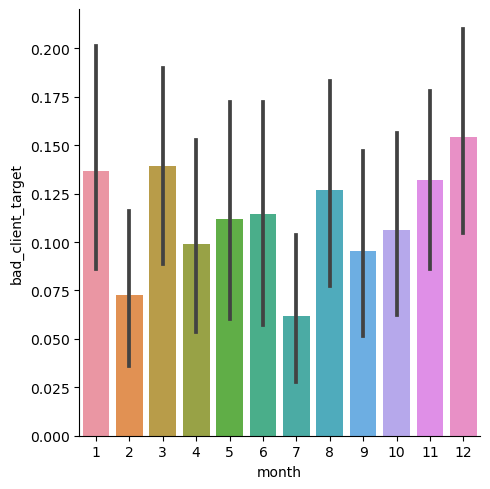

In [44]:
sns.catplot(data=data, x="month", y="bad_client_target", kind="bar")
plt.show()

Eсть сезонность, можно сделать предположение, что большинство кредитов берутся в праздники январь, март, декабрь

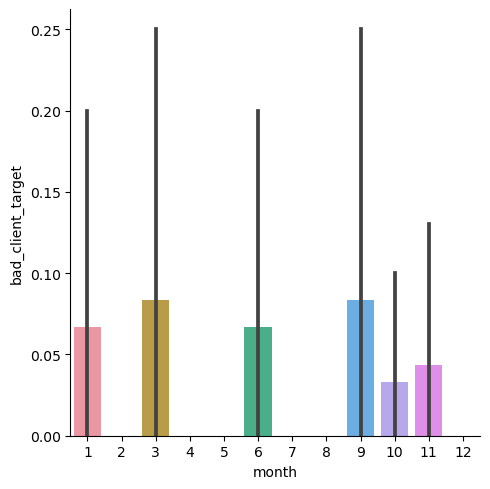

In [45]:
#sns.catplot(data=data[data['cluster'] == 0], x="month", y="bad_client_target", kind="bar")
sns.catplot(data=data[data['cluster'] == 6], x="month", y="bad_client_target", kind="bar")
plt.show()

Кластер 0, 4: Системно не верзращают круглый год есть пики в марте, июне, августе и ноябре.
Кластер 1: в летнии мес
Кластер 2: Не возвращают кредиты если берут в Марте и особенно в декабре
Кластер 5: Декабрь, март  0.25 и 0.4 верояность таргета 1
Кластер 6: Все меньше месяцы 0,1

In [46]:
data.select_dtypes(include='number').columns

Index(['month', 'credit_amount', 'credit_term', 'age', 'having_children_flg',
       'region', 'income', 'phone_operator', 'is_client', 'bad_client_target',
       'cluster'],
      dtype='object')

In [47]:
data['age_group'] = pd.qcut(data['age'], 5)

data.groupby('age_group')['bad_client_target'].agg(['count', 'mean'])
# plt.show()

count      mean
age_group                      
(17.999, 24.0]    359  0.144847
(24.0, 29.0]      335  0.146269
(29.0, 36.0]      361  0.119114
(36.0, 48.0]      350  0.091429
(48.0, 90.0]      318  0.062893

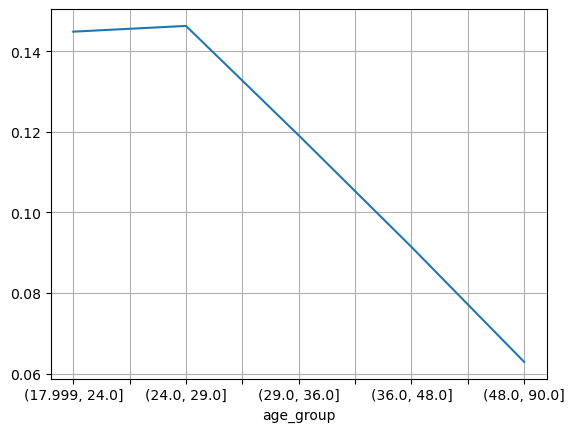

In [48]:
data.groupby('age_group')['bad_client_target'].mean().plot(grid=True)
plt.show()

In [49]:
#data[data['cluster']== 0].groupby('age_group')['bad_client_target'].mean().plot(grid=True)
# data[data['cluster']== 1].groupby('age_group')['bad_client_target'].mean().plot(grid=True) 
# data[data['cluster']== 2].groupby('age_group')['bad_client_target'].mean().plot(grid=True)
# data[data['cluster']== 4].groupby('age_group')['bad_client_target'].mean().plot(grid=True)
# data[data['cluster']== 5].groupby('age_group')['bad_client_target'].mean().plot(grid=True)
#data[data['cluster']== 6].groupby('age_group')['bad_client_target'].mean().plot(grid=True)

plt.show()

С возрастом вероятность, что клиент будет плохим уменьшается

In [50]:
data.groupby('sex')['bad_client_target'].agg(['count', 'mean'])

count      mean
sex                    
female    792  0.146465
male      931  0.085929

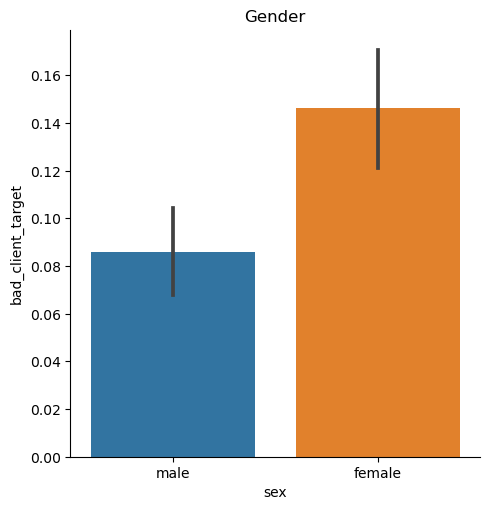

In [51]:
sns.catplot(data=data, x="sex", y="bad_client_target", kind="bar")
plt.title('Gender')
plt.show()

In [52]:
data.groupby('sex')['age'].agg(['count', 'mean', 'median'])

count       mean  median
sex                             
female    792  32.994949    30.0
male      931  38.393126    35.0

In [53]:
data.groupby(['education', 'sex'])['bad_client_target'].agg(['count', 'mean'])

count      mean
education                      sex                    
Higher education               female    210  0.057143
                               male      375  0.061333
Incomplete higher education    female     38  0.078947
                               male       48  0.041667
Incomplete secondary education female      3  0.000000
                               male        2  0.000000
PhD degree                     female      2  0.000000
                               male        1  0.000000
Secondary education            female    104  0.230769
                               male      104  0.153846
Secondary special education    female    435  0.177011
                               male      401  0.097257

У клиентов Secondary education перекос по гендорному признаку, больше женщин.
Secondary special education также есть перекос в сторону женщин, но здесь он значительней больше

In [54]:
data.groupby('education')['credit_amount'].agg(['count', 'mean', 'median'])

count          mean   median
education                                                   
Higher education                  585  37391.452991  28500.0
Incomplete higher education        86  26546.511628  21500.0
Incomplete secondary education      5  41000.000000  20500.0
PhD degree                          3  13666.666667  11500.0
Secondary education               208  24769.230769  18250.0
Secondary special education       836  24961.722488  19000.0

Большие кредиты у людей с Higher education с средней суммой 37391

In [55]:
data['credit_amount_group'] = pd.qcut(data['credit_amount'], 5)

In [56]:
data.groupby('credit_amount_group')['bad_client_target'].agg(['count', 'mean'])

count      mean
credit_amount_group                 
(4999.999, 11500.0]    349  0.103152
(11500.0, 18000.0]     358  0.108939
(18000.0, 26500.0]     337  0.106825
(26500.0, 38000.0]     342  0.149123
(38000.0, 301000.0]    337  0.100890

С размером кредита  от 26500 до 38000 больше плохих клиентов т.е невозвратов

In [57]:
data.groupby(['product_type', 'cluster'])['bad_client_target'].agg(['count', 'mean'])

count      mean
product_type                  cluster                 
Audio & Video                 6            9  0.000000
Auto                          0           21  0.142857
Boats                         2           11  0.090909
Cell phones                   0          497  0.227364
                              6            1  0.000000
Childen's goods               0            1  0.000000
                              2            1  0.000000
Clothing                      6           88  0.045455
Computers                     1          178  0.044944
Construction Materials        4           28  0.142857
                              6            2  0.000000
Cosmetics and beauty services 5           55  0.090909
Fishing and hunting supplies  4            1  0.000000
Fitness                       6           25  0.000000
Furniture                     2          162  0.049383
                              6            2  0.000000
Garden equipment              0            3  0.000000
Household appliances          4          470  0.076596
                              6            1  0.000000
Jewelry                       0           35  0.228571
                              2            1  0.000000
Medical services              2           27  0.037037
Music                         3            1  0.000000
Repair Services               2            3  0.333333
Sporting goods                4            6  0.000000
Tourism                       6           37  0.054054
Training                      6           10  0.000000
Windows & Doors               2           47  0.042553

Можно сказать что самые плохие клиенты покупают сотовые в кредит и они в нулевом кластере

In [58]:
data.groupby(['region', 'cluster'])['bad_client_target'].agg(['count', 'mean'])

count      mean
region cluster                 
0      0           63  0.238095
       1           16  0.000000
       2           35  0.000000
       4           65  0.061538
       5           19  0.000000
       6           42  0.047619
1      0           27  0.111111
       1            8  0.000000
       2           10  0.000000
       4           11  0.000000
       5            7  0.142857
       6            6  0.000000
2      0          467  0.226981
       1          154  0.051948
       2          207  0.062802
       3            1  0.000000
       4          429  0.083916
       5           29  0.137931
       6          127  0.031496

В регионе 2 все больше не платящих клиентов,

In [59]:
data.groupby('having_children_flg')['bad_client_target'].agg(['count', 'mean'])

count      mean
having_children_flg                 
0                      985  0.130964
1                      738  0.090786

Без детей не выплачивают кредит больше

In [60]:
data.groupby(['having_children_flg', 'cluster'])['bad_client_target'].agg(['count', 'mean'])

count      mean
having_children_flg cluster                 
0                   0          349  0.229226
                    1          107  0.056075
                    2          112  0.044643
                    3            1  0.000000
                    4          280  0.107143
                    5           40  0.075000
                    6           96  0.052083
1                   0          208  0.211538
                    1           71  0.028169
                    2          140  0.057143
                    4          225  0.044444
                    5           15  0.133333
                    6           79  0.012658

В 0 кластере равномерно не выплачивают независимо от детей

In [61]:
data.groupby("family_status")['bad_client_target'].agg(['count', 'mean'])

count      mean
family_status                 
Another         1201  0.104080
Married          444  0.139640
Unmarried         78  0.115385

In [62]:
data.groupby(["family_status", 'cluster'])['bad_client_target'].agg(['count', 'mean'])

count      mean
family_status cluster                 
Another       0          367  0.209809
              1          128  0.039062
              2          175  0.045714
              4          365  0.073973
              5           35  0.114286
              6          131  0.030534
Married       0          160  0.256250
              1           42  0.071429
              2           67  0.044776
              3            1  0.000000
              4          123  0.097561
              5           17  0.058824
              6           34  0.058824
Unmarried     0           30  0.200000
              1            8  0.000000
              2           10  0.200000
              4           17  0.058824
              5            3  0.000000
              6           10  0.000000

In [63]:
data['income_group'] = pd.qcut(data['income'], 5)

In [64]:
data.groupby("income_group")['bad_client_target'].agg(['count', 'mean'])

count      mean
income_group                        
(999.999, 20000.0]     361  0.119114
(20000.0, 26000.0]     488  0.118852
(26000.0, 31000.0]     278  0.136691
(31000.0, 41000.0]     285  0.115789
(41000.0, 401000.0]    311  0.077170

In [65]:
data.groupby(["income_group", 'cluster', 'sex'])['bad_client_target'].agg(['count', 'mean'])

count      mean
income_group        cluster sex                    
(999.999, 20000.0]  0       female     46  0.195652
                            male       70  0.214286
                    1       female     10  0.100000
                            male       18  0.055556
                    2       female     14  0.071429
                            male       62  0.064516
                    3       female      0       NaN
                            male        0       NaN
                    4       female     33  0.181818
                            male       83  0.060241
                    5       female      0       NaN
                            male        4  0.000000
                    6       female      2  0.000000
                            male       19  0.052632
(20000.0, 26000.0]  0       female     95  0.252632
                            male       87  0.206897
                    1       female     29  0.068966
                            male       35  0.085714
                    2       female     14  0.142857
                            male       52  0.000000
                    3       female      1  0.000000
                            male        0       NaN
                    4       female     60  0.050000
                            male       76  0.065789
                    5       female      0       NaN
                            male        9  0.111111
                    6       female      8  0.000000
                            male       22  0.000000
(26000.0, 31000.0]  0       female     70  0.300000
                            male       29  0.068966
                    1       female     13  0.000000
                            male        6  0.000000
                    2       female      9  0.222222
                            male       22  0.045455
                    3       female      0       NaN
                            male        0       NaN
                    4       female     42  0.095238
                            male       47  0.085106
                    5       female      1  0.000000
                            male       11  0.181818
                    6       female      4  0.250000
                            male       24  0.041667
(31000.0, 41000.0]  0       female     59  0.271186
                            male       29  0.172414
                    1       female     21  0.000000
                            male       11  0.000000
                    2       female     16  0.000000
                            male       22  0.090909
                    3       female      0       NaN
                            male        0       NaN
                    4       female     52  0.096154
                            male       26  0.038462
                    5       female      0       NaN
                            male       18  0.111111
                    6       female      9  0.111111
                            male       22  0.045455
(41000.0, 401000.0] 0       female     57  0.192982
                            male       15  0.200000
                    1       female     27  0.037037
                            male        8  0.000000
                    2       female     20  0.050000
                            male       21  0.000000
                    3       female      0       NaN
                            male        0       NaN
                    4       female     53  0.094340
                            male       33  0.060606
                    5       female      2  0.000000
                            male       10  0.000000
                    6       female     25  0.000000
                            male       40  0.025000

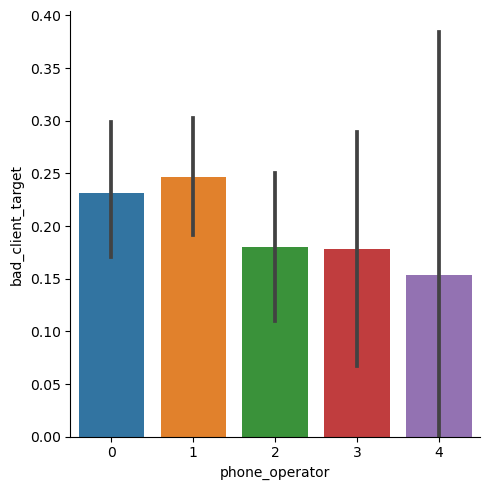

In [66]:
# sns.catplot(data=data[data['cluster']== 1], x="phone_operator", y="bad_client_target", kind="bar")
# plt.show()
sns.catplot(data=data[data['cluster']== 0], x="phone_operator", y="bad_client_target", kind="bar")
plt.show()

Кластер 0: От оператора 0, 1 приходят плохие клиенты.

In [67]:
data[['phone_operator', 'bad_client_target']].groupby('phone_operator').agg('mean').sort_values('bad_client_target', ascending=False)

bad_client_target
phone_operator                   
0                        0.123134
1                        0.121622
4                        0.111111
3                        0.101695
2                        0.088328

In [68]:
data.groupby(['credit_amount_group', 'cluster'])['bad_client_target'].agg(['count', 'mean'])

count      mean
credit_amount_group cluster                 
(4999.999, 11500.0] 0          174  0.149425
                    1           41  0.048780
                    2           22  0.090909
                    3            1  0.000000
                    4           92  0.065217
                    5            0       NaN
                    6           19  0.000000
(11500.0, 18000.0]  0          137  0.226277
                    1           40  0.025000
                    2           54  0.018519
                    3            0       NaN
                    4          110  0.036364
                    5            1  0.000000
                    6           16  0.125000
(18000.0, 26500.0]  0          116  0.198276
                    1           40  0.050000
                    2           44  0.068182
                    3            0       NaN
                    4          118  0.067797
                    5            0       NaN
                    6           19  0.000000
(26500.0, 38000.0]  0          113  0.327434
                    1           35  0.028571
                    2           35  0.057143
                    3            0       NaN
                    4          109  0.082569
                    5            7  0.000000
                    6           43  0.046512
(38000.0, 301000.0] 0           17  0.411765
                    1           22  0.090909
                    2           97  0.051546
                    3            0       NaN
                    4           76  0.171053
                    5           47  0.106383
                    6           78  0.025641

Кто не является клиеном, может быть плохим с размером кредита от 18000 до 26500.

Если клиент то сумма кредита, которую могут не возратить от 26500 до 38000.

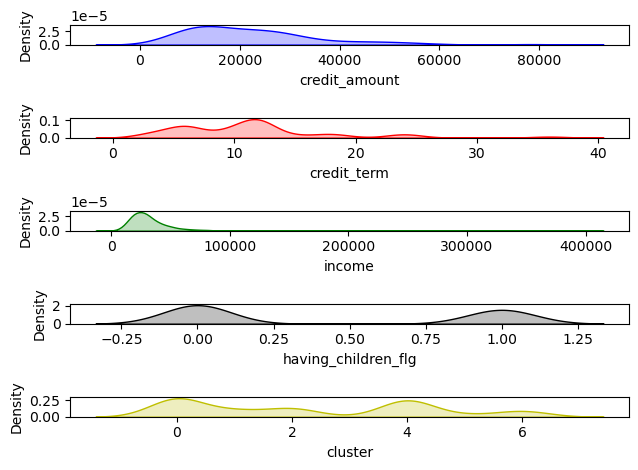

In [69]:
fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5)
sns.kdeplot(data[data['cluster']== 1]["credit_amount"], shade=True, color="b",ax = ax1)
sns.kdeplot(data["credit_term"], shade=True, color="r", ax = ax2)
sns.kdeplot(data["income"], shade=True, color="g", ax = ax3)
sns.kdeplot(data["having_children_flg"], shade=True, color="k", ax = ax4)
sns.kdeplot(data["cluster"], shade=True, color="y", ax = ax5)

fig.tight_layout()
plt.show(fig)

In [70]:
data.groupby( 'cluster')['age'].agg(["count", "median"])

count  median
cluster               
0          557    29.0
1          178    30.0
2          252    41.5
3            1    29.0
4          505    33.0
5           55    44.0
6          175    34.0

**Описание кластеров**

In [71]:
data.groupby(['term_group','cluster'])['bad_client_target'].agg(['count', 'mean']).fillna(0)

count      mean
term_group   cluster                 
(2.999, 6.0] 0          179  0.139665
             1           62  0.000000
             2           76  0.000000
             3            1  0.000000
             4          154  0.032468
             5            0  0.000000
             6           56  0.035714
(6.0, 10.0]  0          104  0.182692
             1           21  0.095238
             2           31  0.032258
             3            0  0.000000
             4           84  0.023810
             5            2  0.000000
             6           23  0.000000
(10.0, 12.0] 0          218  0.261468
             1           76  0.052632
             2           78  0.076923
             3            0  0.000000
             4          148  0.101351
             5            7  0.142857
             6           43  0.046512
(12.0, 15.0] 0           10  0.200000
             1            2  0.000000
             2           11  0.181818
             3            0  0.000000
             4            9  0.222222
             5            0  0.000000
             6           26  0.000000
(15.0, 36.0] 0           46  0.456522
             1           17  0.117647
             2           56  0.071429
             3            0  0.000000
             4          110  0.145455
             5           46  0.086957
             6           27  0.074074

## Образование

In [72]:
data.groupby(['cluster', 'education'])['bad_client_target'].agg(['count', 'mean'])

count      mean
cluster education                                      
0       Higher education                  120  0.125000
        Incomplete higher education        30  0.066667
        Incomplete secondary education      2  0.000000
        PhD degree                          1  0.000000
        Secondary education                87  0.333333
        Secondary special education       317  0.246057
1       Higher education                   58  0.017241
        Incomplete higher education        15  0.066667
        Secondary education                20  0.100000
        Secondary special education        85  0.047059
2       Higher education                  105  0.038095
        Incomplete higher education         8  0.000000
        Secondary education                33  0.030303
        Secondary special education       106  0.075472
3       Higher education                    1  0.000000
4       Higher education                  148  0.054054
        Incomplete higher education        25  0.080000
        PhD degree                          1  0.000000
        Secondary education                58  0.137931
        Secondary special education       273  0.080586
5       Higher education                   40  0.100000
        Incomplete higher education         1  0.000000
        Secondary education                 1  0.000000
        Secondary special education        13  0.076923
6       Higher education                  113  0.026549
        Incomplete higher education         7  0.000000
        Incomplete secondary education      3  0.000000
        PhD degree                          1  0.000000
        Secondary education                 9  0.000000
        Secondary special education        42  0.071429

In [73]:
data.groupby(['cluster'])['is_client'].agg(['count', 'mean'])

count      mean
cluster                 
0          557  0.653501
1          178  0.505618
2          252  0.626984
3            1  1.000000
4          505  0.576238
5           55  0.745455
6          175  0.554286

## Вывод и описание кластеров 

Исходя из проведенного анализа кластеров, можно сделать следующие выводы:

Вероятность невозврата кредита имеет тенденцию уменьшения с возрастом, что может свидетельствовать о более стабильной финансовой ситуации у более взрослых клиентов. Если рассматривать таргет **bad_client_target**

**Кластер 0**: Цель кредитов это сотовые телефоны в основном, и немного драгоценности, берут кредиты круглый год. Средний срок кредита 10 мес и средний размер 18845. Диапозон от 5000 до 40000   Образование (Secondary special education, также есть с Higher education). Пользуются оператором всеми операторами, однако клиенты с bad_client_target 1 полузуются связью с номерами (0, 1). Больше женщин в кластере, чем мужчин(327/230) Средний возраст 31 год. Просрочек больше у бина в возрасте от 29 до 36 лет. В основном семьи без детей(чуть меньше с детьми), так же есть разведенные с детьми. Проживают во 2 регионе. 65 % являются клиентами

**Кластер 1**: Средний срок кредита 12 мес и средний размер 22606. Цель кредита - покупка компьютеров. Средний возраст 30 лет. Большинство проживает во 2 регионе. Только поливина клиентов обслуживаются в банке.


**Кластер 2**: Средний срок кредита 12 мес и средний размер 41859, медианна 29000. Образование высшие и второе высшие(Higher education и Secondary special education). Средний возраст 43 года. Больше всего берут кредит мужчины и тратят на мебель, окна, двери. 62 % клиенты банка.


**Кластер 3**: всего один клиент и кредит, не будем рассматривать (можно объеденить с другим малочисленным кластером)


**Кластер 4**: Средний срок кредита 12 мес и средний размер 26099. Образование (Higher education и Secondary special education). Люди без пары либо в паре т.е другое, при этом практически в равной пропорции с детьми и без. Кредиты на бытовую технику(Household appliances) Большинство проживает во 2 регионе. Средний возраст 36 лет. Равная доля мужчин и женщин.

**Кластер 5**: Средний срок кредита 2 года и средний размер 60 000, медиана 46500. Семейный статус другой. Средний возраст 42 года. Больше всего берут кредит мужчины  и тратят на подарки/услуги(Cosmetics and beauty services). Высокая доля клиентов банка 74%


**Кластер 6**: Средний срок кредита 11 месяцев и средний размер 50534, медианна 36000. Диапозон Образование высшие и второе высшие(Higher education и Secondary special education). Средний возраст 38 лет. Расходы на разные товары и услуги: от туризма, аудио видео, одежды до фитнеса. Семейный статус 'другой' с детьми и без. Больше всего берут кредит мужчины. Большинство проживает во 2 регионе. Чуть больше поливины клиентов обслуживаются в банке.

**Плюсы анализа кластеров:**

* Вы разделили клиентов на несколько кластеров - это помогает понять разнообразие клиентской базы. Это может быть полезно при разработке персонализированных стратегий маркетинга и обслуживания.

* Понимание поведения клиентов: Различные характеристики клиентов внутри каждого кластера, такие как цели кредита, срок кредита, образование, возраст и другие. Это помогает банку лучше понимать, какие типы клиентов более склонны к невозврату кредитов.

* Путем анализа показателей невозврата кредитов внутри каждого кластера, можно выявить слабые стороны и проблемные сегменты клиентов, которые требуют особого внимания, например, бан в клатере 0 от 29 до 36 лет.

**Минусы анализа кластеров:**

* Данные могут быть неполными или устаревшими. Также отсутствует информация о другихх важных факторах, которые могли бы влиять на возврат кредитов, таких как история платежей, кредитный рейтинг, машина и др.

* Не всегда интерпретируемы: Характеристики кластеров могут быть абстрактными и не всегда легко понять, куда его лучше определить.



**Решение бизнес-задач с помощью кластеров**:

* Таргетированной маркетинговой кампании: Разработка специализированных маркетинговых стратегий и предложений для каждого кластера клиентов.

* Управление рисками: Идентификация более рискованных сегментов клиентов и принятие мер для уменьшения рисков.

* Улучшение обслуживания клиентов: Адаптация обслуживания и предоставления услуг под конкретные потребности и предпочтения, 'боли' клиентов.

* Более точное принятие решений о выдаче кредитов и установление условий на основе анализа кредитных потребностей и рисков каждого кластера.

* Отслеживать тренды рынка с помощью мониторига и анализа клиентских данных, чтобы адаптировать свои стратегии и меры в соответствии с изменяющимися потребностями клиентов и рынка, напримем, спроса.



## Что улучшить 

* Кластер можно убрать или соеденить с похожим

* Удалить выбросы, чтобы получить более точную картину. Например, значения для кластера 6: медиана  -36000,	а среднее 50534. Можно отфильтровать значения по IQR.

* Использование более сложных методов кластеризации: Вместо простой кластеризации k-means можно попробовать более продвинутые алгоритмы, такие как Hierarchical Clustering или DBSCAN. Эти методы могут учесть более сложные зависимости между данными и создать более точные кластеры.

* Добавление дополнительных признаков, таких как история платежей, кредитный рейтинг, уровень задолженности.

* Получить обратная связь от коллег: Важно включать в процесс анализа и улучшения кластеризации обратную связь от сотрудников банка. Это поможет адаптировать кластеризацию под конкретные потребности и цели.

* Доработать кластеры у учетом изменений.

<Axes: >

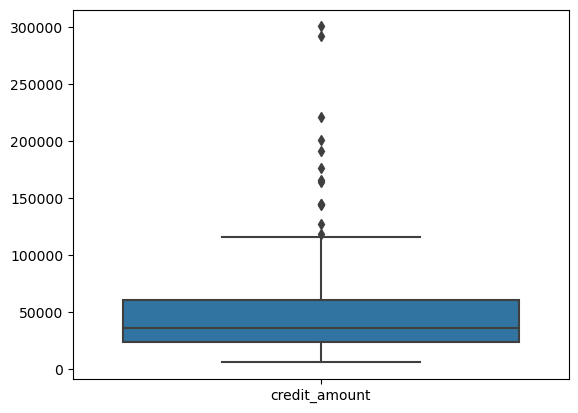

In [74]:
sns.boxplot(data[data['cluster'] == 6][['credit_amount']])